In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [3]:
x_train = x_train/255.0
x_test = x_test/255.0

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
    
    

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1335/1875 [====================>.........] - ETA: 0s - loss: 0.0055 - accuracy: 0.9982

In [20]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

313/313 [==============================] - 0s 980us/step


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n\n",cm)

Confusion Matrix: 

 [[ 971    1    1    1    1    0    1    1    2    1]
 [   0 1126    1    2    0    1    2    1    1    1]
 [   3    3  993    6    8    0    1    5   12    1]
 [   0    0    6  990    0    3    0    3    4    4]
 [   0    2    2    1  972    0    1    0    0    4]
 [   2    0    0   15    2  861    4    1    5    2]
 [   3    2    1    1    7    4  940    0    0    0]
 [   0    6    6    4    0    0    0 1005    3    4]
 [   2    0    2    7    3    6    2    2  946    4]
 [   3    2    1    3   12    0    0    2    2  984]]


In [23]:
acc=accuracy_score(y_test, y_pred)
acc

0.9788

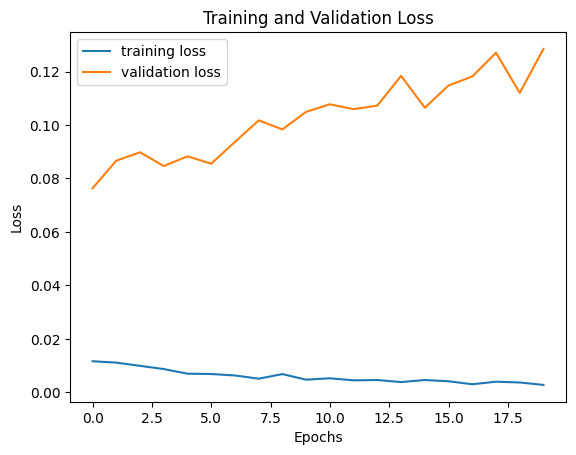

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()